# Case 3: Dansk Industri, del 2
*Anders Reinholt Sindberg (dks656) & Albert Neve Alsbjerg (kmp116)*


## Klargøring og import
Til databehandklingen vil følgende biblioteker blive brugt
- **pandas** til at strukturere vores data
- **numpy** til matematiske funktioner
- **matplotlib** til at plotte data
- **afinn** til sentimentanalyse
- **nltk** til frekvensanalyse og tokenization
- **pprint** til nemmere print i python

De vil nu blive importeret:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from afinn import Afinn
import nltk
from nltk.tokenize import word_tokenize
from pprint import pprint

## Delanalyse A
Først importeres bilag 6:

In [2]:
#bilaget importeres, ID sættes som indeks for datasættet. Dertil tilføjes datatyper til kolonnerne
df_mdb = pd.read_excel("bilag_6.xlsx",\
                       index_col=0, \
                       sheet_name="Medlemmernes Dag besvarelser")
#inspiceres
df_mdb

,"Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?",Farvemarkering af hvordan det går,"Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?",Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder,Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling,Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser,Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker,Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever/lærlinge,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Overenskomster,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Udenlandsk arbejdskraft,Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?
Virksom- hedsID,,,,,,,,,,,,,,,,
3,Virksomheden er en del af byggebranchen. Ingen...,Grøn,"Virksomhedens ejerleder, Maria, giver udtryk f...",False,False,False,False,False,False,False,False,False,False,False,False,DI's jurahjælp er ikke så meget til hjælp. (ju...
4,"Det går rigtig godt, de får mange gode ordre. ...",Grøn,Deres største udfordringer pt. er at priserne ...,False,False,False,False,False,False,False,False,False,False,False,False,Det er godt tilfreds med deres medlemsskab og ...
5,"Det går godt. Det optager os, om vi kan blive ...",Grøn,Mangel på kvalificeret arbejdskraft. Vi mangle...,False,False,True,False,False,False,False,False,False,False,False,False,Vi skal gøre en ekstra indsats for at få flere...
6,Høj aktivitet,Grøn,"Selv om der er mange igangværende sager, så er...",False,False,True,False,False,False,False,False,False,False,False,False,Har brugt medlemsskabet i Dansk Træ meget. Og ...
7,"Går rigtig godt, meget travlt. \nHar en masse ...",Grøn,"Nej, alt går godt. \nEnetse udfordring har vær...",False,False,True,False,False,False,False,False,False,False,False,False,Sætter stor nyhedsbrevene. Rigtig stor fornøje...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1659,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN
1668,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN


### Hvor mange nævner covid?
Dette undersøger vi på tværs af alle svar kategorier.

Først oprettes en funktion, der returnere 1 hvis medlemmet omtaler corona, og 0 hvis medlemmet ikke omtaler corona. Derefter funktionen køres på medlemmernes svar, og resultatet gemmes i ny kolonne med navnet: "covid"

In [3]:
# funktion der tjekker om teksten i samtlige celler i en række indholder covid-19 relaterede ord
# returnerer 1 hvis der nævnes corona
def check_covid(row):
    #liste over covid-19 ord der testes for
    covid_words = ['corona', 
                 'coronaen', 
                 'coronatest',
                 'corona-virus', 
                 'coronatest',
                 'coronavirus', 
                 'corona-19', 
                 'coronatid', 
                 'covid',
                 'Covid-19', 
                 'covid19', 
                 'Epidemi',
                 'epidemi', 
                 'epidemien', 
                 'Epidemien', 
                 'nedlukning', 
                 'Nedlukning', 
                 'Nedlukninger', 
                 'nedlukninger', 
                 'nedlukningen', 
                 'Nedlukninger', 
                 'coronanedlukning', 
                 'ansigtsmasker', 
                 'Ansigtmasker', 
                 'ansigtsmaske', 
                 'Ansigtsmaske', 
                 'maske', 
                 'Maske', 
                 'masker', 
                 'Masker', 
                 'Værnemidler', 
                 'flokimmunitet', 
                 'hjemmekarantæne', 
                 'Hjemmekarantæne', 
                 'smitteopsporing',
                 'afbødning', 
                 'afspritning', 
                 'Afspritning', 
                 'flokimmunitet',  
                 'forsamlingsforbud',
                 'mundbind', 
                 'Mundbind', 
                 'opholdsforbud',
                 'pandemisk', 
                 'Pandemi', 
                 'pandemi', 
                 'pandemien', 
                 'Pandemien', 
                 'podepind', 
                 'selvisolation', 
                 'Selvisolation', 
                 'smittekæde', 
                 'Smittekæde', 
                 'Smittekæder', 
                 'smittekæder',
                 'smitteopsporing',
                 'smittespredning', 
                 'smittetal',
                 'smittetilfælde', 
                 'Smittetilfælde', 
                 'smittetryk',
                 'superspreder',  
                 'svælgprøve', 
                 'testkit', 
                 'virusudbrud',  
                 'Virusudbrud', 
                 'værnemiddel', 
                 'Værnemiddel',
                 'kompensation',
                 'lønkompensation',
                 'hjælpepakke',
                 'hjælpepakker',
                 'hjælpepakken']
    # loop hver kolonne (hvilket giver en celle)
    for column in df_mdb.columns:
        #tokenize ordende
        text = str(row[column]).replace("/", " ").lower()
        token_list = word_tokenize(str(text))
        # tjek om covid-ordene findes og retunér 1 eller 0
        if any(w.lower() in token_list for w in covid_words):
            return 1
        else:
            return 0

# Funktionen køres på medlemmernes svar, og gemmes i ny kolonne med navnet: "covid"
df_mdb["covid"] = df_mdb.apply(check_covid, axis=1)
#inspiceres
df_test = df_mdb.sort_index()
df_test.head(5)

,"Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?",Farvemarkering af hvordan det går,"Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?",Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder,Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling,Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser,Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker,Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever/lærlinge,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Overenskomster,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Udenlandsk arbejdskraft,Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?,covid
Virksom- hedsID,,,,,,,,,,,,,,,,,
1,Vi vil gerne have åbne landet op. Der skal ske...,Gul,Det offentlige er gået hjem for et år siden. D...,False,False,False,True,False,False,False,False,False,False,False,False,I behøver ikke sende generel information ud pr...,1
2,Optaget af Covid.,Rød,"Det er en montagevirksomhed, og der er folk so...",False,False,False,False,False,False,True,True,False,False,False,False,"Det går rigtig fint - de får den hjælp, som de...",1
3,Virksomheden er en del af byggebranchen. Ingen...,Grøn,"Virksomhedens ejerleder, Maria, giver udtryk f...",False,False,False,False,False,False,False,False,False,False,False,False,DI's jurahjælp er ikke så meget til hjælp. (ju...,0
4,"Det går rigtig godt, de får mange gode ordre. ...",Grøn,Deres største udfordringer pt. er at priserne ...,False,False,False,False,False,False,False,False,False,False,False,False,Det er godt tilfreds med deres medlemsskab og ...,1
5,"Det går godt. Det optager os, om vi kan blive ...",Grøn,Mangel på kvalificeret arbejdskraft. Vi mangle...,False,False,True,False,False,False,False,False,False,False,False,False,Vi skal gøre en ekstra indsats for at få flere...,0


Det nu muligt at beregne andelen og antallet af medlemmerne der omtaler covid: 

In [4]:
print('Andel der nævner covid: ' + str(df_mdb['covid'].mean()))
print('Antal: ' + str(df_mdb['covid'].sum()))

Andel der nævner covid: 0.2817647058823529
Antal: 479


### Sammenhæng mellem DI's farvekodning og covid

Funktionen køres på medlemmernes svar, og gemmes i ny kolonne med navnet: "covid".

Først inspiceres fordelingen:

In [5]:
split_vars = ['Farvemarkering af hvordan det går'] 
apply_vars = ['covid']
apply_fcts = ['mean', 'size']

df_mdb.groupby(split_vars)[apply_vars].agg(apply_fcts)

covid     
                                       mean size
Farvemarkering af hvordan det går               
Grøn                               0.279234  992
Gul                                0.290323  248
Rød                                0.481203  266

Fordelingen illustreres:

Text(0.5, 1.0, 'Andel der omtaler corona')

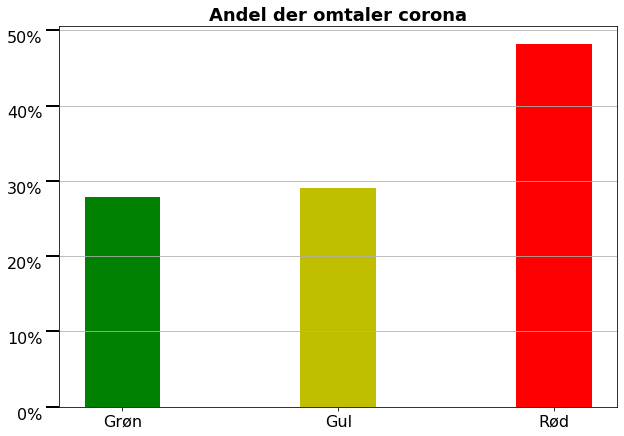

In [6]:
# samme split-apply-combine køres igen og gemmes i et midlertidigt dataframe
split_vars = ['Farvemarkering af hvordan det går'] 
apply_vars = ['covid']
apply_fcts = ['mean', 'size']

df_illu1 = df_mdb.groupby(split_vars)[apply_vars].agg(apply_fcts)

# værdier og navne på x-aksen til plottet hentes ud af det midlertidige dataframe
x_labels = df_illu1.index.get_level_values(0)
l_covid = list(df_illu1['covid']['mean'])


values = np.array(l_covid)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.35, color=['g', 'y', 'r'])

# x-aksen
x_ticks = [0, 1, 2]
plt.xticks(x_ticks, x_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)
# omdan y-aksen til procent
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

# tilføj grid
plt.grid(axis = 'y')

ax.set_title('Andel der omtaler corona', \
             fontweight='bold', \
             fontsize='18')

### Undersøgelse af medlemmer kodet som "Rød":

In [54]:
df_baggrund = pd.read_excel("bilag_6.xlsx",\
                           index_col=0, \
                           sheet_name="Baggrundsdata på deltagere",
                           dtype={'VirksomhedsID': int})
df_baggrund.sort_index(inplace=True)
df_baggrund=df_baggrund.loc[df_baggrund.index.dropna()]
df_baggrund

#liste over brancvhefællesskab:
l_branche = df_baggrund["Branche\nfælleskaber (navn)"]

#tilføjes til andet dataframe
df_mdb.sort_index(inplace=True)
df_mdb["Branchefællesskab"] = l_branche

In [65]:
split_vars = ['Branchefællesskab'] 
apply_vars = ['covid']
apply_fcts = ['mean','size']

df_mdb_temp = df_mdb[df_mdb['Farvemarkering af hvordan det går']=="Rød"]

df_mdb_temp.groupby(split_vars)[apply_vars].agg(apply_fcts)

covid     
                                       mean size
Branchefællesskab                               
0                                  0.520325  123
DI Byg                             0.666667    3
DI Byg, DI Handel                  1.000000    1
DI Dansk Byggeri                   0.303030   66
DI Digital                         0.500000    6
DI Energi                          0.000000    1
DI Fødevarer                       0.750000    4
DI Handel                          0.375000   16
DI Handel, Turisme & Oplevelse     1.000000    2
DI Life Science                    0.000000    1
DI Rådgiverne                      0.200000    5
DI Service                         0.428571    7
DI Service, DI Life Science        0.000000    1
DI Transport                       0.823529   17
DI Transport, DI Handel            0.333333    3
DI Transport, Turisme & Oplevelse  0.500000    2
Turisme & Oplevelse                0.875000    8

In [64]:
df_mdb_temp['covid']['mean']

KeyError: 'mean'

In [92]:
# split-apply-combine dataframe køres igen og gemmes i midlertidigt dataframe
df_illu1 = df_mdb_temp.groupby(split_vars)[apply_vars].agg(apply_fcts)
df_illu1 = df_illu1.sort_values(by=('covid', 'size'), ascending=False)

x_labels = df_illu1.index.get_level_values(0) 
l_covid = list(df_illu1['covid']['size'])

#labels printes
x_labels

Index([                                  0,
                        'DI Dansk Byggeri',
                            'DI Transport',
                               'DI Handel',
                     'Turisme & Oplevelse',
                              'DI Service',
                              'DI Digital',
                           'DI Rådgiverne',
                            'DI Fødevarer',
                                  'DI Byg',
                 'DI Transport, DI Handel',
       'DI Transport, Turisme & Oplevelse',
          'DI Handel, Turisme & Oplevelse',
                               'DI Energi',
                         'DI Life Science',
             'DI Service, DI Life Science',
                       'DI Byg, DI Handel'],
      dtype='object', name='Branchefællesskab')

Illustreres:

Text(0.5, 1.0, 'Branchefællesskab')

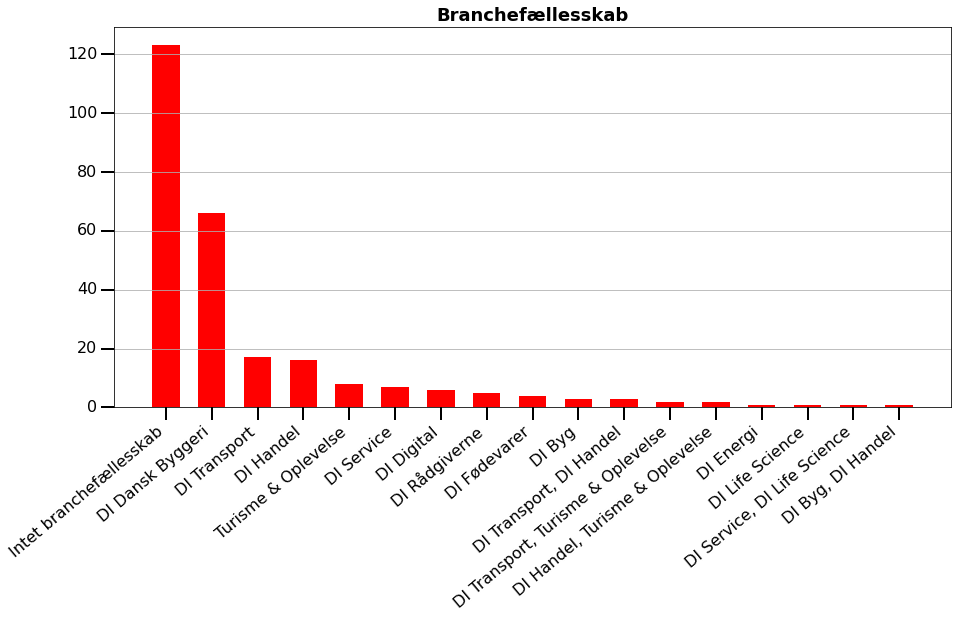

In [93]:
x_labels = [     'Intet branchefællesskab',
                        'DI Dansk Byggeri',
                            'DI Transport',
                               'DI Handel',
                     'Turisme & Oplevelse',
                              'DI Service',
                              'DI Digital',
                           'DI Rådgiverne',
                            'DI Fødevarer',
                                  'DI Byg',
                 'DI Transport, DI Handel',
       'DI Transport, Turisme & Oplevelse',
          'DI Handel, Turisme & Oplevelse',
                               'DI Energi',
                         'DI Life Science',
             'DI Service, DI Life Science',
                       'DI Byg, DI Handel']

values = np.array(l_covid)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x, values, 0.6, color='r')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=40, \
           fontsize='16', \
           horizontalalignment='right', \
           verticalalignment='top')
plt.tick_params(axis='x', direction='out', length=13, width=2)

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='center')
plt.tick_params(axis='y', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Branchefællesskab', \
             fontweight='bold', \
             fontsize='18')

### Sammenhæng mellem covid og sentimentscore
Først oprettes et mål sentimentscore. Dette gøres med `AFINN`.

En funktion oprettes og køres på data'en:

In [7]:
# funktion
def calc_sentiment(row):
    #afinn til sentimentscore initialiseres
    afinn = Afinn(language='da', emoticons=True)
    # sentimentscore beregnes og returneres
    return afinn.score(str(row["Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?"]))

# funktionen køres og sentimentscoren gemmes i ny kolonne "sentimentscore"
df_mdb["sentimentscore"] = df_mdb.apply(calc_sentiment, axis=1)

#inspiceres
df_test = df_mdb.sort_index()
df_test.head(5)

,"Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?",Farvemarkering af hvordan det går,"Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?",Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder,Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling,Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser,Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker,Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever/lærlinge,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Overenskomster,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Udenlandsk arbejdskraft,Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?,covid,sentimentscore
Virksom- hedsID,,,,,,,,,,,,,,,,,,
1,Vi vil gerne have åbne landet op. Der skal ske...,Gul,Det offentlige er gået hjem for et år siden. D...,False,False,False,True,False,False,False,False,False,False,False,False,I behøver ikke sende generel information ud pr...,1,-1.0
2,Optaget af Covid.,Rød,"Det er en montagevirksomhed, og der er folk so...",False,False,False,False,False,False,True,True,False,False,False,False,"Det går rigtig fint - de får den hjælp, som de...",1,-1.0
3,Virksomheden er en del af byggebranchen. Ingen...,Grøn,"Virksomhedens ejerleder, Maria, giver udtryk f...",False,False,False,False,False,False,False,False,False,False,False,False,DI's jurahjælp er ikke så meget til hjælp. (ju...,0,3.0
4,"Det går rigtig godt, de får mange gode ordre. ...",Grøn,Deres største udfordringer pt. er at priserne ...,False,False,False,False,False,False,False,False,False,False,False,False,Det er godt tilfreds med deres medlemsskab og ...,1,4.0
5,"Det går godt. Det optager os, om vi kan blive ...",Grøn,Mangel på kvalificeret arbejdskraft. Vi mangle...,False,False,True,False,False,False,False,False,False,False,False,False,Vi skal gøre en ekstra indsats for at få flere...,0,1.0


Sammenhæng mellem covid og sentimentscoren visualiseres:

In [40]:
split_vars = ['covid'] 
apply_vars = ['sentimentscore']
apply_fcts = ['mean', 'size']

df_illu1 = df_mdb.groupby(split_vars)[apply_vars].agg(apply_fcts)
df_illu1

sentimentscore      
                mean  size
covid                     
0           1.102375  1221
1           0.707724   479

Text(0.5, 1.0, 'Sentimentscore:')

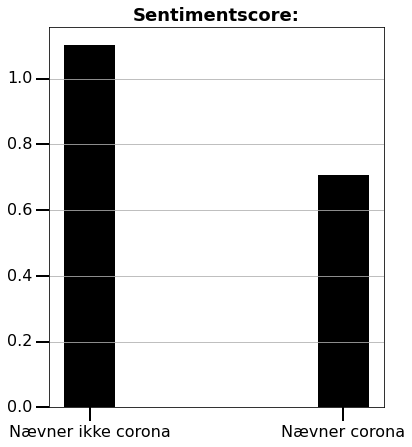

In [41]:
x_labels = ["Nævner ikke corona", "Nævner corona"] 
l_covid = list(df_illu1['sentimentscore']['mean'])

values = np.array(l_covid)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(6,7))
ax.bar(x, values, 0.2, color='k')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')
plt.tick_params(axis='x', direction='out', length=14, width=2)

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='center')
plt.tick_params(axis='y', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Sentimentscore:', \
             fontweight='bold', \
             fontsize='18')

### Sammenlign DI’s farvekodning af svar med sentiment-scoren

In [10]:
split_vars = ['Farvemarkering af hvordan det går'] 
apply_vars = ['sentimentscore']
apply_fcts = ['mean', 'size']

df_illu1 = df_mdb.groupby(split_vars)[apply_vars].agg(apply_fcts)
df_illu1

sentimentscore     
                                            mean size
Farvemarkering af hvordan det går                    
Grøn                                    1.771169  992
Gul                                     0.508065  248
Rød                                    -0.842105  266

In [68]:
x_labels = df_illu1.index.get_level_values(0) 
l_covid = list(df_illu1['sentimentscore']['mean'])

values = np.array(l_covid)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.35, color=['g', 'y', 'r'])

# horizontal linje
ax.plot([-0.3, 2.3], [0, 0], "k--")

# x-aksen
x_ticks = [0, 1, 2]
plt.xticks(x_ticks, x_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='center')
plt.tick_params(axis='y', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Sentimentscore', \
             fontweight='bold', \
             fontsize='18')


KeyError: 'sentimentscore'

## Delanalyse B

Kolonne navnene printes til kopiering i kode nedenfor.

In [12]:
print(df_mdb.columns)

Index(['Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?',
       'Farvemarkering af hvordan det går',
       'Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?',
       'Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder',
       'Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling',
       'Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser',
       'Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker',
       'Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft',
       'Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever

Et dataframe med afkrydsning af spørgsmål 2 oprettes.

In [13]:
# liste af kolonne navne kopieret ind fra output ovenfor
udfordring_list = ['Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder',
       'Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling',
       'Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling',
       'Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser',
       'Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker',
       'Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft',
       'Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever/lærlinge',
       'Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Overenskomster',
       'Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Udenlandsk arbejdskraft']

# lister til dataframe konstruktion
l_sps = []
l_sum = []
l_mean = []

# lister populeres
for i in range(len(udfordring_list)):
    l_sps.append(udfordring_list[i].split("\n")[1])
    l_sum.append(df_mdb[udfordring_list[i]].sum())
    l_mean.append(df_mdb[udfordring_list[i]].mean())
    
# dataframet konstrueres
df_bi =pd.DataFrame({'Spørgsmål':l_sps,
                          'Sum':l_sum,
                          'Mean':l_mean})
# inspiceres
df_bi

,Spørgsmål,Sum,Mean
0,Politisk interessevaretagelse: Administrative ...,148,0.087059
1,Politisk interessevaretagelse: Adgang til kapital,38,0.022353
2,Politisk interessevaretagelse: Adgang til arbe...,298,0.175294
3,Politisk interessevaretagelse: Adgang til mark...,108,0.063529
4,Politisk interessevaretagelse: Digital omstilling,61,0.035882
5,Politisk interessevaretagelse: Grøn omstilling,93,0.054706
6,Corona: Afskedigelser,57,0.033529
7,Corona: Lønkompensation og hjælpepakker,136,0.080000
8,Corona: Udenlandsk arbejdskraft,49,0.028824
9,OK/Personalejuridisk: Elever/lærlinge,84,0.049412


Ovenstående illustreres med et søljediagram:

Text(0.5, 1.0, 'Udfordringer:')

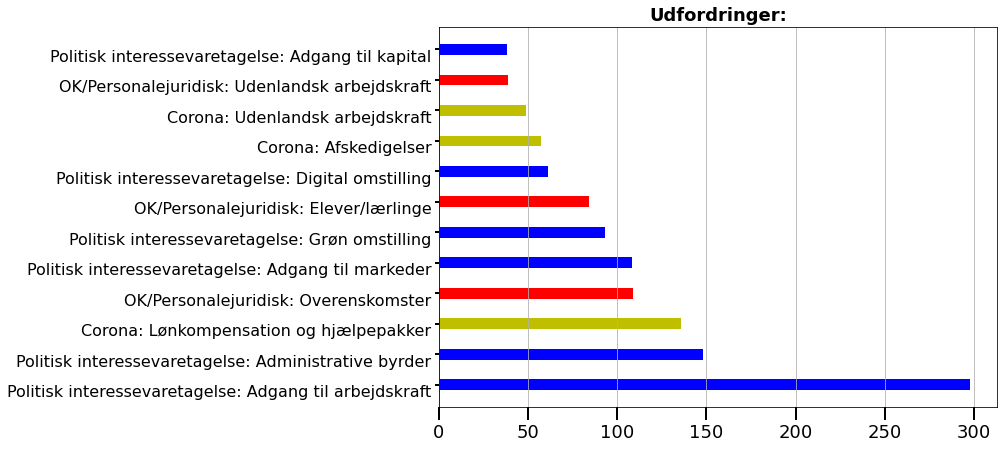

In [14]:
df_bi = df_bi.sort_values(by="Sum", ascending=False)

y_labels = df_bi["Spørgsmål"]
values = df_bi["Sum"]

values = np.array(values)
y = range(len(values))

# and plot it
fig, ax = plt.subplots(figsize=(10,7))
ax.barh(y, values, 0.35, color=['b', 'b', 'y', 'r', 'b', 'b', 'r', 'b', 'y', 'y', 'r', 'b'])

# y-aksen
y_ticks = []
for i in range(len(y_labels)):
    y_ticks.append(i)
plt.yticks(y_ticks, y_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='right', \
           verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=4, width=2)

# x-aksen
plt.xticks(
          fontsize='18', \
          horizontalalignment='center', \
          verticalalignment='top')
plt.tick_params(axis='x', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'x')

#set titel
ax.set_title('Udfordringer:', \
             fontweight='bold', \
             fontsize='18')

### Typer af udfordringer med frekvensanalyse

In [15]:
#en samlet lang liste over alle medlemmernes besvarelse i tokenized form:
samlet_liste = []

for i in range(len(df_mdb['Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?'])):
    text = df_mdb['Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?'][i+1]
    if type(text) == str:
        samlet_liste.extend(word_tokenize(text))
    
fd = nltk.FreqDist(samlet_liste)    

Inspiceres:

In [16]:
fd.tabulate(10)

   .    ,   at   er   og    i   på ikke  har  det 
3815 1811 1370 1306 1049  857  728  710  707  685 


Stopwords importeres:

In [17]:
from spacy.lang.da.stop_words import STOP_WORDS
STOP_WORDS

{'af',
 'aldrig',
 'alene',
 'alle',
 'allerede',
 'alligevel',
 'alt',
 'altid',
 'anden',
 'andet',
 'andre',
 'at',
 'bag',
 'begge',
 'blandt',
 'blev',
 'blive',
 'bliver',
 'burde',
 'bør',
 'da',
 'de',
 'dem',
 'den',
 'denne',
 'dens',
 'der',
 'derefter',
 'deres',
 'derfor',
 'derfra',
 'deri',
 'dermed',
 'derpå',
 'derved',
 'det',
 'dette',
 'dig',
 'din',
 'dine',
 'disse',
 'dog',
 'du',
 'efter',
 'egen',
 'eller',
 'ellers',
 'en',
 'end',
 'endnu',
 'ene',
 'eneste',
 'enhver',
 'ens',
 'enten',
 'er',
 'et',
 'flere',
 'flest',
 'fleste',
 'for',
 'foran',
 'fordi',
 'forrige',
 'fra',
 'få',
 'før',
 'først',
 'gennem',
 'gjorde',
 'gjort',
 'god',
 'gør',
 'gøre',
 'gørende',
 'ham',
 'han',
 'hans',
 'har',
 'havde',
 'have',
 'hel',
 'heller',
 'hen',
 'hende',
 'hendes',
 'henover',
 'her',
 'herefter',
 'heri',
 'hermed',
 'herpå',
 'hun',
 'hvad',
 'hvem',
 'hver',
 'hvilke',
 'hvilken',
 'hvilkes',
 'hvis',
 'hvor',
 'hvordan',
 'hvorefter',
 'hvorfor',
 'hv

Stop-ord fjernes:

In [18]:
samlet_liste = [w.lower() for w in samlet_liste if w.lower() not in STOP_WORDS]

Herefter køres uni-, bi-, tri- og quadgram analyse.

In [19]:
fd = nltk.FreqDist(samlet_liste)  
fd.most_common(10)

[('.', 3815),
 (',', 1811),
 ('-', 473),
 ('corona', 295),
 ('arbejdskraft', 226),
 ('svært', 222),
 ('virksomheden', 206),
 ('medarbejdere', 174),
 ('udfordringer', 168),
 ('udfordring', 140)]

In [20]:
finder = nltk.collocations.BigramCollocationFinder.from_words(samlet_liste)
pprint(finder.ngram_fd.most_common(15))

[(('.', 'corona'), 114),
 (('.', 'svært'), 100),
 (('arbejdskraft', '.'), 99),
 (('corona', '.'), 94),
 (('.', 'virksomheden'), 82),
 (('.', 'nej'), 79),
 (('pga', '.'), 75),
 (('kvalificeret', 'arbejdskraft'), 74),
 (('ift', '.'), 50),
 (('.', 'mangler'), 49),
 (('medarbejdere', '.'), 46),
 ((')', '.'), 45),
 (('.', 'udfordringer'), 45),
 (('corona', ','), 43),
 ((',', 'når'), 42)]


In [21]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(samlet_liste)
pprint(finder.ngram_fd.most_common(15))

[(('kvalificeret', 'arbejdskraft', '.'), 36),
 (('.', 'corona', '.'), 31),
 (('pga', '.', 'corona'), 27),
 (('.', 'nej', ','), 26),
 (('.', 'nej', '.'), 23),
 (('.', 'svært', 'finde'), 17),
 (('.', 'største', 'udfordring'), 15),
 (('udenlandsk', 'arbejdskraft', '.'), 13),
 (('hele', 'tiden', '.'), 11),
 (('mangel', 'kvalificeret', 'arbejdskraft'), 11),
 (('.', 'kvalificeret', 'arbejdskraft'), 10),
 (('.', 'corona', ','), 9),
 (('.', 'corona', '-'), 9),
 (('finde', 'kvalificeret', 'arbejdskraft'), 9),
 (('.', 'svært', 'skaffe'), 9)]


Ud af ovenstående aflæser vi, at de tre kategorier medlemmerne har flest udfordringer er:
1. Mangel på (kvalificeret) arbejdskraft
2. Corona
3. Ingen problemer fylder ekstra meget

Det visualiseres:

In [22]:
# antallet tælles fra outpu ovenfor og lægges sammne ud af ovenstående output:
n_arbejdskraft = 36+13+11+10+9
n_corona = 31+27+9+9
n_nej = 26+23

# samles i lister og derefter et dataframe:
l_udf = [n_arbejdskraft, n_corona, n_nej]
l_titel = ["Arbejdskraft", "Corona", "Intet"]
df_bii =pd.DataFrame({'Udfordring':l_titel,
                          'Sum':l_udf})
df_bii

,Udfordring,Sum
0,Arbejdskraft,79
1,Corona,76
2,Intet,49


Dette illustreres:

Text(0.5, 1.0, 'Udfordringer:')

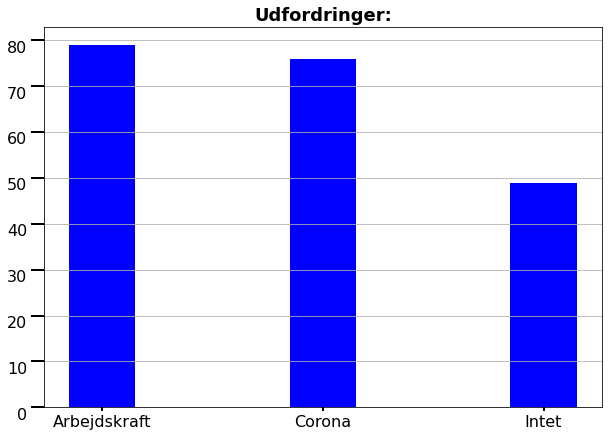

In [23]:
x_labels = df_bii["Udfordring"]
values = df_bii["Sum"]

values = np.array(values)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.3, color='b')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=0, \
           fontsize='16', \
           horizontalalignment='center', \
           verticalalignment='top')
plt.tick_params(axis='x', direction='out', length=4, width=2)

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)

# tilføj grid
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Udfordringer:', \
             fontweight='bold', \
             fontsize='18')

## Delanalyse C
Frekvensanalyse ved uni-, bi- og trigram analyse:

In [24]:
#en samlet lang liste over alle medlemmernes besvarelse i tokenized form:
samlet_liste2 = []

for i in range(len(df_mdb['Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?'])):
    text = df_mdb['Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?'][i+1]
    if type(text) == str:
        samlet_liste2.extend(word_tokenize(text))
    
fd = nltk.FreqDist(samlet_liste2)
fd.tabulate(10)

   .    ,   at   er   og   DI    i  for  til  det 
3927 2121 1459 1303 1200 1131 1041  962  870  865 


Stop-ord fjernes, samt punktum og kommaer:

In [25]:
samlet_liste2 = [w.lower() for w in samlet_liste2 if w.lower() not in STOP_WORDS]
samlet_liste2 = [w.lower() for w in samlet_liste2 if w.lower() not in ['.', ',']]
fd = nltk.FreqDist(samlet_liste2)  
fd.most_common(10)

[('di', 1142),
 ('-', 472),
 ('godt', 406),
 ('tilfreds', 241),
 ('virksomheden', 224),
 (')', 210),
 ('bruger', 210),
 ('hjælp', 176),
 ('(', 172),
 ('gerne', 172)]

Bigram-analyse:

In [26]:
finder = nltk.collocations.BigramCollocationFinder.from_words(samlet_liste2)
pprint(finder.ngram_fd.most_common(15))

[(('godt', 'tilfreds'), 97),
 (('bruger', 'di'), 78),
 (('dansk', 'byggeri'), 70),
 (('di', "'s"), 65),
 (('tilfreds', 'di'), 51),
 (('di', 'godt'), 43),
 (('di', '-'), 42),
 (('di', 'dansk'), 29),
 (('rigtig', 'godt'), 25),
 (('godt', 'tilfredse'), 25),
 (('di', 'bedre'), 25),
 (('får', 'hjælp'), 23),
 (('bruge', 'di'), 23),
 (('kontakt', 'di'), 23),
 (('brugt', 'di'), 23)]


Trigram-analyse:

In [27]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(samlet_liste2)
pprint(finder.ngram_fd.most_common(15))

[(('di', 'dansk', 'byggeri'), 23),
 (('godt', 'tilfreds', 'di'), 21),
 ((':', '-', ')'), 16),
 (('dansk', 'byggeri', 'di'), 8),
 (('rigtig', 'godt', 'tilfreds'), 8),
 (('virksomheden', 'bruger', 'di'), 7),
 (('bruger', 'primært', 'di'), 7),
 (('godt', 'tænke', 'di'), 7),
 (('dansk', 'byggeri', ')'), 6),
 (('får', 'hjælp', 'brug'), 6),
 (('!', '!', '!'), 6),
 (('generelt', 'godt', 'tilfreds'), 5),
 (('di', "'s", 'indsats'), 5),
 (('(', 'dansk', 'byggeri'), 5),
 (('godt', 'tilfreds', 'medlemskabet'), 5)]


Quadgram-analyse:

In [28]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(samlet_liste2)
pprint(finder.ngram_fd.most_common(15))

[(('(', 'dansk', 'byggeri', ')'), 5),
 (('di', '(', 'dansk', 'byggeri'), 4),
 (('!', '!', '!', '!'), 4),
 (('godt', 'tilfredse', 'medlemskabet', 'di'), 3),
 (('rigtig', 'godt', 'tilfreds', 'di'), 3),
 (('virksomheden', 'fint', 'tilfreds', 'medlemskabet'), 2),
 (('fint', 'tilfreds', 'medlemskabet', 'di'), 2),
 (('gerne', 'kampagne', 'rettet', 'mod'), 2),
 (('får', 'hjælp', 'når', 'henvender'), 2),
 (('di', "'s", 'juridiske', 'afdeling'), 2),
 (('søgt', 'rådgivning', 'hos', 'di'), 2),
 (('godt', 'tilfredse', 'di', 'bruger'), 2),
 (('tilfredse', 'di', 'bruger', 'di'), 2),
 (('felix', 'dalker', '(', 'di'), 2),
 (('primært', 'brugt', 'di', "'s"), 2)]


Vi finder et overvæld af postive tilbagemeldinger. For at finde steder DI kan forbedre sig, måler vi sentimentscoren for hver tilbagemeldning. Derefter kan vi gentage ovenstående analyse, men med fokus på de medlemmer, der er blandt den mindst positive halvdel:

In [29]:
# funktion
def calc_sentiment2(row):
    #afinn til sentimentscore initialiseres
    afinn = Afinn(language='da', emoticons=True)
    return afinn.score(str(row["Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?"]))


df_mdb["sentimentscore2"] = df_mdb.apply(calc_sentiment2, axis=1)
df_test = df_mdb.sort_index()
df_test.head(5)

,"Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?",Farvemarkering af hvordan det går,"Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?",Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder,Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling,Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser,Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker,Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever/lærlinge,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Overenskomster,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Udenlandsk arbejdskraft,Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?,covid,sentimentscore,sentimentscore2
Virksom- hedsID,,,,,,,,,,,,,,,,,,,
1,Vi vil gerne have åbne landet op. Der skal ske...,Gul,Det offentlige er gået hjem for et år siden. D...,False,False,False,True,False,False,False,False,False,False,False,False,I behøver ikke sende generel information ud pr...,1,-1.0,2.0
2,Optaget af Covid.,Rød,"Det er en montagevirksomhed, og der er folk so...",False,False,False,False,False,False,True,True,False,False,False,False,"Det går rigtig fint - de får den hjælp, som de...",1,-1.0,4.0
3,Virksomheden er en del af byggebranchen. Ingen...,Grøn,"Virksomhedens ejerleder, Maria, giver udtryk f...",False,False,False,False,False,False,False,False,False,False,False,False,DI's jurahjælp er ikke så meget til hjælp. (ju...,0,3.0,-3.0
4,"Det går rigtig godt, de får mange gode ordre. ...",Grøn,Deres største udfordringer pt. er at priserne ...,False,False,False,False,False,False,False,False,False,False,False,False,Det er godt tilfreds med deres medlemsskab og ...,1,4.0,6.0
5,"Det går godt. Det optager os, om vi kan blive ...",Grøn,Mangel på kvalificeret arbejdskraft. Vi mangle...,False,False,True,False,False,False,False,False,False,False,False,False,Vi skal gøre en ekstra indsats for at få flere...,0,1.0,3.0


Medianen udregnes:

In [30]:
print(df_mdb["sentimentscore2"].median())

2.0


Bi-, tri- og quadgram analyse foretages på de medlemmer med en sentimentscore under medianen:

In [31]:
#en samlet lang liste over alle medlemmernes besvarelse i tokenized form:
samlet_liste3 = []

for i in range(len(df_mdb['Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?'])):
    text = df_mdb['Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?'][i+1]
    if (type(text) == str) and (df_mdb["sentimentscore2"][i+1] < 2.0):
        samlet_liste3.extend(word_tokenize(text))
    
fd = nltk.FreqDist(samlet_liste3)
fd.tabulate(10)

   .    ,   at   er    i   og ikke   DI  for  til 
1268  655  491  414  353  345  317  297  294  263 


Stop-ord fjernes:

In [32]:
samlet_liste3 = [w.lower() for w in samlet_liste3 if w.lower() not in STOP_WORDS]
samlet_liste3 = [w.lower() for w in samlet_liste3 if w.lower() not in ['.', ',']]
fd = nltk.FreqDist(samlet_liste3)  
fd.most_common(10)

[('di', 300),
 ('-', 172),
 ('bruger', 81),
 ('gerne', 70),
 ('virksomheden', 67),
 (')', 65),
 ('(', 60),
 ('fokus', 39),
 ('dansk', 38),
 ('virksomheder', 36)]

Bigram-analyse:

In [33]:
finder = nltk.collocations.BigramCollocationFinder.from_words(samlet_liste3)
pprint(finder.ngram_fd.most_common(15))

[(('bruger', 'di'), 35),
 (('dansk', 'byggeri'), 21),
 (('di', "'s"), 14),
 (('di', '-'), 14),
 (('udenlandsk', 'arbejdskraft'), 11),
 (('små', 'virksomheder'), 10),
 (('brugt', 'di'), 9),
 (('stående', 'fod'), 9),
 (('store', 'virksomheder'), 8),
 (('di', 'arbejde'), 8),
 (('svært', 'finde'), 7),
 (('administrative', 'byrder'), 7),
 (('di', 'dansk'), 7),
 (('tage', 'fat'), 7),
 (('mener', 'di'), 6)]


Trigram-analyse:

In [34]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(samlet_liste3)
pprint(finder.ngram_fd.most_common(15))

[(('di', 'dansk', 'byggeri'), 6),
 (('-', 'dansk', 'byggeri'), 4),
 (('bruger', 'di', '-'), 3),
 (('bruger', 'primært', 'di'), 3),
 (('di', 'personalejuridiske', 'spørgsmål'), 2),
 (('kommentarer', 'brugt', 'di'), 2),
 (('små', 'virksomheder', 'di'), 2),
 (('lette', 'administrative', 'byrder'), 2),
 (('dansk', 'byggeri', '('), 2),
 (('di', 'blevet', 'store'), 2),
 (('medarbejdere', 'haft', 'corona'), 2),
 (('blevet', 'større', 'udfordring'), 2),
 (('større', 'udfordring', 'frost'), 2),
 ((')', 'nej', 'bruger'), 2),
 (('fokus', 'små', 'virksomheder'), 2)]


Ud af ovenstående aflæser vi, at medlemmer har udfordringer med:
1. Arbejdskraft
2. Dansk Byggeri
3. Administratrive byrder
4. Små virksomheder
5. Store virksomheder
6. Grøn omstilling
7. Juridsk rådgivning

In [35]:
# antallet tælles og lægges sammne ud af ovenstående output:
n_arbejdskraft = 11+5
n_db = 21
n_ab = 7
n_småv = 10
n_stov =8
n_grøn = 5
n_jura = 4

# samles i lister og derefter et dataframe:
l_udf = [n_arbejdskraft, n_db, n_ab, n_småv, n_stov, n_grøn, n_jura]
l_titel = ["Arbejdskraft", "Dansk Byggeri", "Administrative byrder", "Små virksomheder", "Store virksomheder", "Grøn omstilling", "Juridsk rådgivning"]
df_biii =pd.DataFrame({'Udfordring':l_titel,
                          'Sum':l_udf})
df_biii = df_bii.sort_values(by="Sum", ascending=False)
df_biii

,Udfordring,Sum
0,Arbejdskraft,79
1,Corona,76
2,Intet,49


Dette illustreres:

Text(0.5, 1.0, 'Forbedringspunkter (blandt negative svar):')

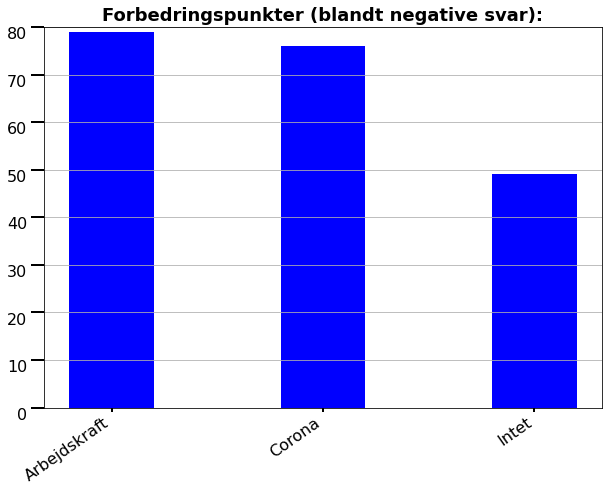

In [36]:
x_labels = df_biii["Udfordring"]
values = df_biii["Sum"]

values = np.array(values)
x = range(len(values))

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x, values, 0.4, color='b')

# x-aksen
x_ticks = []
for i in range(len(x_labels)):
    x_ticks.append(i)
plt.xticks(x_ticks, x_labels, \
           rotation=35, \
           fontsize='16', \
           horizontalalignment='right', \
           verticalalignment='top')
plt.tick_params(axis='x', direction='out', length=4, width=2)

# y-aksen
plt.yticks(
          fontsize='16', \
          horizontalalignment='right', \
          verticalalignment='top')
plt.tick_params(axis='y', direction='out', length=13, width=2)
ax.set_ylim([0, 80])

# tilføj horisontale linjer
plt.grid(axis = 'y')

# tilføj titel
ax.set_title('Forbedringspunkter (blandt negative svar):', \
             fontweight='bold', \
             fontsize='18')

In [38]:
df_mdb.sort_index(inplace=True)
df_mdb[70:80]

,"Spørgsmål 1. Hvordan går det \nhos jer, og hvad optager jer lige nu?",Farvemarkering af hvordan det går,"Spørgsmål 2. Har I udfordringer, \nder fylder ekstra meget i øjeblikket?",Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Administrative byrder,Spørgsmål 2. Afkrydsning\nPolitisk interessevaretagelse: Adgang til kapital,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til arbejdskraft,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Adgang til markeder,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Digital omstilling,Spørgsmål 2. Afkrydsning \nPolitisk interessevaretagelse: Grøn omstilling,Spørgsmål 2. Afkrydsning \nCorona: Afskedigelser,Spørgsmål 2. Afkrydsning \nCorona: Lønkompensation og hjælpepakker,Spørgsmål 2. Afkrydsning \nCorona: Udenlandsk arbejdskraft,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Elever/lærlinge,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Overenskomster,Spørgsmål 2. Afkrydsning \nOK/Personalejuridisk: Udenlandsk arbejdskraft,Spørgsmål 3: \nHvordan kan vi i DI gøre det endnu bedre for dig og din virksomhed?,covid,sentimentscore,sentimentscore2
Virksom- hedsID,,,,,,,,,,,,,,,,,,,
71,Virksomhedens direktør befinder sig i England ...,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,1,3.0,0.0
72,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,0,0.0,0.0
73,"Umiddelbart går det fint, vi er del af byggebr...",Gul,"Råvarerpriserne der er høje. Vi frygter, at fi...",False,False,False,False,False,False,False,False,False,False,False,False,Har ikke nogle konkrete sitiationer. Lige nu ...,0,-1.0,4.0
74,Umiddelbar reaktion: I sender jo ellers så man...,Grøn,Byggeribranchen er lidt ophedet. Nervøs for pr...,False,False,False,False,False,False,False,False,False,False,False,False,Savner ikke noget som sådan. Vigtigt at offent...,1,8.0,0.0
75,"Det går godt, der er mange opgaver der presser...",Grøn,Arbejdsbyrde.,False,False,False,False,False,False,False,False,False,False,False,False,Har god glæde af informationer fra DI og benyt...,0,4.0,8.0
76,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,NaN,0,0.0,0.0
77,Forsinkelser og tidsforskydninger af projekter...,Rød,Ikke udover ovenstående. Har styr på coronahån...,False,False,False,False,False,False,False,False,False,False,False,False,Er medlem af bestyrelsen for Malersektionen og...,0,-1.0,10.0
78,"Det går rigtig hos virksomheden, Ikke ramt af ...",Grøn,De har travlt på den gode måde..,False,False,False,False,False,False,False,False,False,False,False,False,"De bruger ikke rigtig DI, måske har de brugt p...",1,-2.0,0.0
79,Som det plejer. Har travlt. I vinter roligt. M...,Grøn,Vi har haft problemer med leveringstid og pris...,False,False,True,False,False,False,False,False,False,False,False,False,Ikke gøre noget bedre. Efter det bliver DI - d...,0,2.0,9.0
